In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
my_data = np.genfromtxt('mnist_train.csv', delimiter=',')

5.0

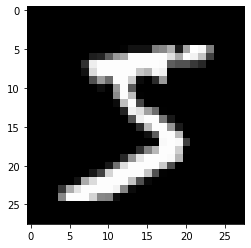

In [3]:
fig = plt.figure()
plt.imshow(np.reshape(my_data[0,1:], (28, -1)), cmap="gray")
my_data[0,0]

In [4]:
dim = 28
labels = my_data[:,0]
images = my_data[:,1:]

def getnumdata(label):
    numind = np.where(labels == label)
    numdata = images[numind]
    return(numdata)

eightdata = getnumdata(8)
numeight = len(eightdata[:, 0])

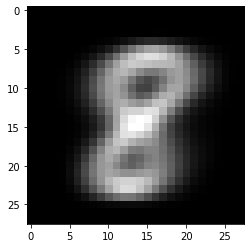

In [5]:
avg_eight = np.sum(eightdata, axis=0) / numeight
plt.imshow(np.reshape(avg_eight, (dim, -1)), cmap="gray")

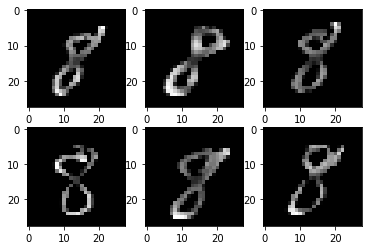

In [6]:
# cast all to int16 and subtract each image vector from the average before taking the outer product
eightdata = eightdata.T
A = np.zeros((dim * dim, numeight), dtype=np.int16)
for i in np.arange(numeight):
    A[:, i] = eightdata[:, i].astype(np.int16) - avg_eight.astype(np.int16)
    A[:, i][A[:, i] < 0] = 0
A.astype(np.uint8) 
    
fig, axes = plt.subplots(2, 3)
count = 0
for i in np.arange(2):
    for j in np.arange(3):
        axes[i, j].imshow(np.reshape(A[:, count], (dim, -1)), cmap='gray')
        count = count + 1

In [18]:
A.shape

(784, 5851)

In [17]:
# covariance matrix
S = np.matmul(A.T.astype(float), A.astype(float))
# D is eigenvalues, V is eigenvectors
D, V = np.linalg.eig(S)
# sort D, and then sort V the same way to get the eigenvectors in descending order
order = D.argsort()[::-1]
V = V[:, order]

# normalize U for output
U = np.matmul(A.astype(float), V)
U = np.real(U)
squares = np.square(U)
denom = np.sqrt(np.sum(squares, axis=0))
for i in np.arange(numeight):
    U[:, i] = U[:, i] / denom[i]

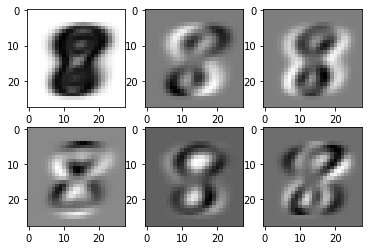

In [31]:
fig, axes = plt.subplots(2, 3)
count = 0
for i in np.arange(2):
    for j in np.arange(3):
        axes[i, j].imshow(np.reshape(U[:, count], (dim, -1)), cmap='gray')
        count = count + 1

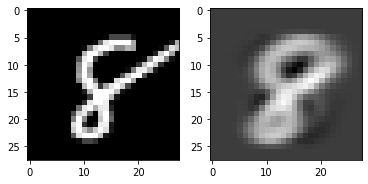

In [34]:
try_reconst = 50
n_eig = 10
omegas = np.matmul(U[:, 1:n_eig].T, (eightdata[:, try_reconst].astype(float)) - avg_eight)
res = np.matmul(U[:, 1:n_eig], omegas) + avg_eight.astype(float)

fig, axes = plt.subplots(1,2)
axes[0].imshow(np.reshape(eightdata[:, try_reconst], (dim, -1)), cmap='gray')
axes[1].imshow(np.reshape(res, (dim, -1)), cmap='gray')